In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


# **Loading** **Dataset**

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/ML/cleaned_AQI.csv')

# **About** **dataset**

This dataset tracks air quality using multiple pollutants measured over time. It includes gases like SO2, NO, NO2, NOX, CO, and O3, as well as particulates like PM2.5 and PM10. All of these contribute to the AQI (Air Quality Index), which tells you how clean or polluted the air is.


In essence, it’s a snapshot of the air we breathe—how dirty or clean it is, and what’s floating around in it. Perfect for studying pollution patterns and its impact on health.

-SO2 (Sulfur Dioxide):
A gas produced by volcanic eruptions and industrial processes, especially the burning of fossil fuels.
High levels can cause respiratory problems and contribute to acid rain.

-NO (Nitric Oxide):
A gas emitted from vehicle exhausts and industrial emissions.
It can react with oxygen to form NO2, contributing to smog and acid rain.

-NO2 (Nitrogen Dioxide):
A reddish-brown gas formed from NO reacting with oxygen.
It's a major component of urban air pollution and can irritate the lungs.

-NOX (Nitrogen Oxides):
A combination of NO and NO2.
These gases contribute to the formation of ground-level ozone and fine particulate pollution.

-CO (Carbon Monoxide):
A colourless, odourless gas produced by burning fossil fuels.
High levels are dangerous as it reduces oxygen delivery to the body’s organs.

-O3 (Ozone):
At ground level, it's a harmful pollutant formed by chemical reactions between NOX and VOCs in sunlight.
Causes respiratory issues and damages crops.

-PM2.5 (Particulate Matter ≤ 2.5 micrometres):
Tiny particles that penetrate deep into the lungs.
They can cause heart and lung diseases. Very harmful!

-PM10 (Particulate Matter ≤ 10 micrometres):
Larger than PM2.5 but still harmful when inhaled.
Typically includes dust, pollen, and mould spores.

-AQI (Air Quality Index):
A calculated index representing overall air quality.

The higher the number, the worse the air quality. Levels are typically categorised as Good, Moderate, Unhealthy, and Hazardous.

In [3]:
data

,Date,Time,SO2,NO,NO2,NOX,CO,O3,PM2.5,PM10,Temperature,RH,Solar Rad,Month,Day,AQI,AQI_severity,Location
0,2012-11-01 00:00:00,01:00,5.87,2.98,32.91,35.90,1.20,3.66,93.45,113.85,27.50,77.78,7.76,11.0,1.0,170.594837,Unhealthy,Dhaka
1,2012-11-01 00:00:00,02:00,5.87,23.64,34.91,58.55,1.14,3.17,73.61,108.25,27.39,77.38,7.64,11.0,1.0,160.350790,Unhealthy,Dhaka
2,2012-11-01 00:00:00,03:00,0.29,40.71,34.84,75.55,1.20,3.23,60.27,85.49,26.60,81.52,7.71,11.0,1.0,153.462908,Unhealthy,Dhaka
3,2012-11-01 00:00:00,04:00,0.94,78.05,33.78,112.34,1.30,3.28,70.64,101.54,26.06,83.04,7.63,11.0,1.0,158.817281,Unhealthy,Dhaka
4,2012-11-01 00:00:00,05:00,0.47,63.62,31.90,95.74,1.15,3.26,90.43,117.05,25.75,83.75,7.57,11.0,1.0,169.035511,Unhealthy,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592743,2020-12-31 15:59:59.515000,17:00,5.82,2.46,0.57,3.03,6.71,23.64,64.33,86.84,33.06,107.44,982.36,12.0,31.0,155.559220,Unhealthy,Chittagong
592744,2020-12-31 16:59:59.515000,18:00,5.31,3.05,0.56,3.62,6.47,10.15,78.05,123.35,32.20,107.40,982.89,12.0,31.0,162.643309,Unhealthy,Chittagong
592745,2020-12-31 17:59:59.515000,19:00,7.60,3.50,0.74,4.24,7.55,8.51,88.55,163.93,32.11,107.35,983.48,12.0,31.0,168.064805,Unhealthy,Chittagong
592746,2020-12-31 18:59:59.515000,20:00,11.51,4.57,2.21,6.77,7.49,5.86,102.69,170.34,32.11,107.33,984.26,12.0,31.0,175.365753,Unhealthy,Chittagong


In [4]:
data.shape

(592748, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592748 entries, 0 to 592747
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          592748 non-null  object 
 1   Time          592748 non-null  object 
 2   SO2           592748 non-null  float64
 3   NO            592748 non-null  float64
 4   NO2           592748 non-null  float64
 5   NOX           592748 non-null  float64
 6   CO            592748 non-null  float64
 7   O3            592748 non-null  float64
 8   PM2.5         592748 non-null  float64
 9   PM10          592748 non-null  float64
 10  Temperature   592748 non-null  float64
 11  RH            592748 non-null  float64
 12  Solar Rad     592748 non-null  float64
 13  Month         592748 non-null  float64
 14  Day           592748 non-null  float64
 15  AQI           592748 non-null  float64
 16  AQI_severity  592748 non-null  object 
 17  Location      592748 non-null  object 
dtypes: f

In [6]:
data.nunique()

,0
Date,15543
Time,51
SO2,10858
NO,22181
NO2,12857
NOX,27969
CO,3764
O3,10345
PM2.5,38764
PM10,57056


In [7]:
data.describe()


,SO2,NO,NO2,NOX,CO,O3,PM2.5,PM10,Temperature,RH,Solar Rad,Month,Day,AQI
count,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000,592748.000000
mean,6.530921,18.056319,14.121151,29.890021,1.351559,7.792850,73.719882,130.115702,25.384932,74.069985,201.171277,6.754503,15.533751,127.008956
std,13.209102,34.504462,16.376954,41.932617,1.553004,10.790835,67.994043,112.976401,4.934506,18.641907,271.587392,3.521374,8.987407,83.939726
min,-0.340000,-12.640000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.030000,-9.200000,3.560000,0.000000,1.000000,1.000000,0.037736
25%,2.140000,3.090000,5.360000,8.910000,0.610000,2.010000,31.820000,63.790000,23.358230,66.230000,12.900000,4.000000,8.000000,63.618026
50%,3.540000,6.240000,9.940000,17.250000,0.940000,4.690000,54.230000,102.880000,25.960000,77.589267,70.900000,7.000000,16.000000,115.808889
75%,6.340000,19.295000,16.180000,29.870000,1.640000,8.530000,89.370000,158.470000,27.781710,84.678773,320.720000,10.000000,23.000000,171.506505
max,299.940000,590.310000,399.470000,653.670000,79.810000,149.420000,1072.200000,1354.820000,1022.800000,6813.750000,28890.330000,12.000000,31.000000,500.000000


In [8]:
data.columns

Index(['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10',
       'Temperature', 'RH', 'Solar Rad', 'Month', 'Day', 'AQI', 'AQI_severity',
       'Location'],
      dtype='object')

# **Data cleaning**

In [9]:
data.isnull().sum()

,0
Date,0
Time,0
SO2,0
NO,0
NO2,0
NOX,0
CO,0
O3,0
PM2.5,0
PM10,0


# **EDA**

In [10]:
data['AQI_severity'].value_counts()

,count
AQI_severity,
Unhealthy,160256
Moderate,159996
Good,102112
Unhealthy for Sensitive Groups,92690
Very Unhealthy,52494
Hazardous,25200


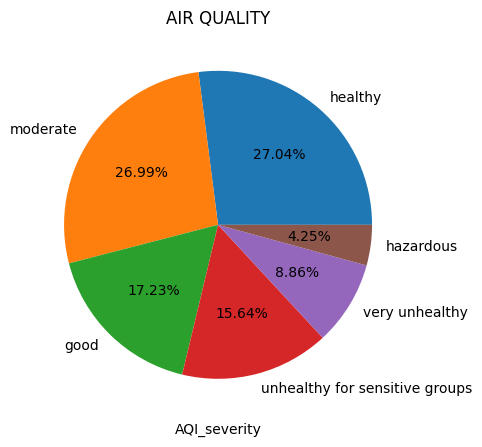

In [13]:
plt.figure(figsize=(10,5))
values=['healthy','moderate','good','unhealthy for sensitive groups','very unhealthy','hazardous']
plt.pie(data['AQI_severity'].value_counts(),labels=values,autopct='%1.2f%%')
plt.xlabel('AQI_severity')
plt.title('AIR QUALITY')
plt.show()


In [12]:
data['Location'].value_counts()

,count
Location,
Dhaka,171450
Rajshahi,65050
Barishal,62801
Narayonganj,61344
Gazipur,59707
Sylhet,59243
Khulna,45675
Chittagong,41270
Rangpur,8048


In [20]:
data=data.drop(['Date','Time','Month','Day','Location'],axis=1)
data

,SO2,NO,NO2,NOX,CO,O3,PM2.5,PM10,Temperature,RH,Solar Rad,AQI,AQI_severity
0,5.87,2.98,32.91,35.90,1.20,3.66,93.45,113.85,27.50,77.78,7.76,170.594837,Unhealthy
1,5.87,23.64,34.91,58.55,1.14,3.17,73.61,108.25,27.39,77.38,7.64,160.350790,Unhealthy
2,0.29,40.71,34.84,75.55,1.20,3.23,60.27,85.49,26.60,81.52,7.71,153.462908,Unhealthy
3,0.94,78.05,33.78,112.34,1.30,3.28,70.64,101.54,26.06,83.04,7.63,158.817281,Unhealthy
4,0.47,63.62,31.90,95.74,1.15,3.26,90.43,117.05,25.75,83.75,7.57,169.035511,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592743,5.82,2.46,0.57,3.03,6.71,23.64,64.33,86.84,33.06,107.44,982.36,155.559220,Unhealthy
592744,5.31,3.05,0.56,3.62,6.47,10.15,78.05,123.35,32.20,107.40,982.89,162.643309,Unhealthy
592745,7.60,3.50,0.74,4.24,7.55,8.51,88.55,163.93,32.11,107.35,983.48,168.064805,Unhealthy
592746,11.51,4.57,2.21,6.77,7.49,5.86,102.69,170.34,32.11,107.33,984.26,175.365753,Unhealthy


In [21]:
le=LabelEncoder()
data.AQI_severity=le.fit_transform(data['AQI_severity'])
data

,SO2,NO,NO2,NOX,CO,O3,PM2.5,PM10,Temperature,RH,Solar Rad,AQI,AQI_severity
0,5.87,2.98,32.91,35.90,1.20,3.66,93.45,113.85,27.50,77.78,7.76,170.594837,3
1,5.87,23.64,34.91,58.55,1.14,3.17,73.61,108.25,27.39,77.38,7.64,160.350790,3
2,0.29,40.71,34.84,75.55,1.20,3.23,60.27,85.49,26.60,81.52,7.71,153.462908,3
3,0.94,78.05,33.78,112.34,1.30,3.28,70.64,101.54,26.06,83.04,7.63,158.817281,3
4,0.47,63.62,31.90,95.74,1.15,3.26,90.43,117.05,25.75,83.75,7.57,169.035511,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592743,5.82,2.46,0.57,3.03,6.71,23.64,64.33,86.84,33.06,107.44,982.36,155.559220,3
592744,5.31,3.05,0.56,3.62,6.47,10.15,78.05,123.35,32.20,107.40,982.89,162.643309,3
592745,7.60,3.50,0.74,4.24,7.55,8.51,88.55,163.93,32.11,107.35,983.48,168.064805,3
592746,11.51,4.57,2.21,6.77,7.49,5.86,102.69,170.34,32.11,107.33,984.26,175.365753,3


In [22]:
x=data.drop('AQI_severity',axis=1)
y=data['AQI_severity']

In [23]:

x

,SO2,NO,NO2,NOX,CO,O3,PM2.5,PM10,Temperature,RH,Solar Rad,AQI
0,5.87,2.98,32.91,35.90,1.20,3.66,93.45,113.85,27.50,77.78,7.76,170.594837
1,5.87,23.64,34.91,58.55,1.14,3.17,73.61,108.25,27.39,77.38,7.64,160.350790
2,0.29,40.71,34.84,75.55,1.20,3.23,60.27,85.49,26.60,81.52,7.71,153.462908
3,0.94,78.05,33.78,112.34,1.30,3.28,70.64,101.54,26.06,83.04,7.63,158.817281
4,0.47,63.62,31.90,95.74,1.15,3.26,90.43,117.05,25.75,83.75,7.57,169.035511
...,...,...,...,...,...,...,...,...,...,...,...,...
592743,5.82,2.46,0.57,3.03,6.71,23.64,64.33,86.84,33.06,107.44,982.36,155.559220
592744,5.31,3.05,0.56,3.62,6.47,10.15,78.05,123.35,32.20,107.40,982.89,162.643309
592745,7.60,3.50,0.74,4.24,7.55,8.51,88.55,163.93,32.11,107.35,983.48,168.064805
592746,11.51,4.57,2.21,6.77,7.49,5.86,102.69,170.34,32.11,107.33,984.26,175.365753


In [24]:
y

,AQI_severity
0,3
1,3
2,3
3,3
4,3
...,...
592743,3
592744,3
592745,3
592746,3


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [26]:
log_score=cross_val_score(LogisticRegression(),x,y,cv=5)
tree_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
knn_score=cross_val_score(KNeighborsClassifier(),x,y,cv=5)
rf_score=cross_val_score(RandomForestClassifier(),x,y,cv=5)
# svr_score=cross_val_score(SVC(),x,y,cv=5)
ada_score=cross_val_score(AdaBoostClassifier(),x,y,cv=5)
gnb_score=cross_val_score(GaussianNB(),x,y,cv=5)

In [27]:
print(np.mean(log_score))
print(np.mean(tree_score))
print(np.mean(knn_score))
print(np.mean(rf_score))
# print(np.mean(svr_score))
print(np.mean(ada_score))
print(np.mean(gnb_score))

0.8339665738696109
1.0
0.923837780716976
0.999876845070682
0.3286421885945017
0.8946399647339855


In [28]:
model=KNeighborsClassifier()


In [29]:
p=model.get_params()
p

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [30]:
gscv=GridSearchCV(model,{'n_neighbors':range(1,20)})
gcv=gscv.fit(x_train,y_train)

In [31]:
gs_data=gscv.cv_results_
df=pd.DataFrame(gs_data)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.605856,0.142401,19.278270,0.889671,1,{'n_neighbors': 1},0.965268,0.963929,0.965848,0.964582,0.965278,0.964981,0.000662,18
1,1.595905,0.148586,23.424269,0.579582,2,{'n_neighbors': 2},0.960270,0.960576,0.961714,0.960544,0.961809,0.960983,0.000646,19
2,1.672949,0.121229,25.621749,0.764757,3,{'n_neighbors': 3},0.969190,0.968842,0.970065,0.969833,0.971056,0.969797,0.000767,15
3,1.705581,0.305281,27.759202,0.848359,4,{'n_neighbors': 4},0.965953,0.967029,0.968189,0.967324,0.968178,0.967334,0.000830,17
4,1.681200,0.307338,29.021439,0.778613,5,{'n_neighbors': 5},0.970983,0.970677,0.972385,0.971446,0.972163,0.971531,0.000658,10
5,1.734832,0.306742,30.758890,1.053982,6,{'n_neighbors': 6},0.968526,0.969253,0.969654,0.969243,0.970592,0.969454,0.000676,16
6,1.572199,0.110494,31.818225,0.596559,7,{'n_neighbors': 7},0.971668,0.971499,0.972976,0.971626,0.972638,0.972081,0.000604,7
7,1.716147,0.307784,33.464779,1.313623,8,{'n_neighbors': 8},0.970150,0.970013,0.970814,0.969664,0.971151,0.970358,0.000544,14
8,1.683593,0.195920,34.640988,1.180182,9,{'n_neighbors': 9},0.972206,0.971868,0.973092,0.971731,0.973165,0.972412,0.000605,5
9,1.806305,0.280444,35.356628,0.862507,10,{'n_neighbors': 10},0.970698,0.970751,0.971658,0.970149,0.971815,0.971014,0.000628,13


In [32]:
gscv.best_params_

{'n_neighbors': 13}

In [33]:
gscv.best_score_

0.972646447361752

In [34]:
 y_pred=gscv.predict(x_test)

In [35]:
y_pred

array([5, 0, 3, ..., 2, 3, 3])

In [36]:
df1=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
df1

,actual_value,predicted_value
274115,5,5
137222,0,0
97602,3,3
263301,2,2
488165,2,2
...,...,...
237059,4,4
487352,4,4
115041,2,2
369201,3,3


In [41]:
prediction_kerala=gscv.predict([[2,2.66,5,41.32,468,10,37,71,34,83,50.59,112]])
prediction_kerala

array([2])

In [43]:
prediction_malappuram=gscv.predict([[6,6,17,51,2,21,48,35,39,85,5.5,48]])
prediction_malappuram

array([0])

In [45]:
prediction_calicut=gscv.predict([[4,69,7,9,513,17,35,82,31,76,800,98]])
prediction_calicut

array([2])

In [37]:
confusion_matrix(y_test,y_pred)
cm

array([[19966,     1,   502,     2,     2,     0],
       [    0,  4957,     0,     0,     0,   128],
       [  284,     0, 31614,     1,   267,     0],
       [    0,     1,     5, 31564,   192,   143],
       [    5,     1,   439,   727, 17340,     1],
       [    0,    77,     0,   402,     0,  9929]])

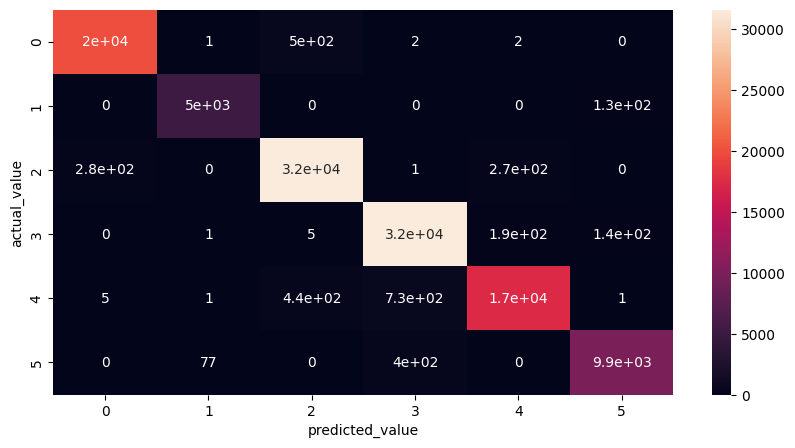

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_value')
plt.show()

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     20473
           1       0.98      0.97      0.98      5085
           2       0.97      0.98      0.98     32166
           3       0.97      0.99      0.98     31905
           4       0.97      0.94      0.96     18513
           5       0.97      0.95      0.96     10408

    accuracy                           0.97    118550
   macro avg       0.98      0.97      0.97    118550
weighted avg       0.97      0.97      0.97    118550

